In [3]:
import pandas as pd
import numpy as np

from auxiliary import get_joint_distribution

---
# Lecture 4: Models of causal exposure and identification criteria for conditioning estimators
---

---
## Conditioning and directed graphs
---

<img src="material/fig-backdoor-path.png" height="300" width="300" />

This graph is an example where a simple mean-comparison between the treated and untreated is not informative on the effect of the treatment.

What was the graph behind our analysis of the Lalonde dataset?

<img src="material/fig-implicit-lalonde.png" height="500" width="500" />

#### Illustration of collider variables

We introduced collider variables earlier. However, they will play a very important role going forward and thus we study in an illustration how conditioning on a **collider** induces a conditional association between two variables without an unconditional association.

<img src="material/fig-collider-variable.png" height="500" width="500" />


In [3]:
# SAT scores and individual motivation are uncorrelated in the population
num_individuals = 250
SAT = np.random.normal(loc=1, scale=1, size=num_individuals)
motivation = np.random.normal(loc=1, scale=1, size=num_individuals)

# Both toghether determine college admission
score = SAT + motivation
cutoff = np.percentile(score, 85)
is_admitted = score > cutoff

# For further processing we create a data frame.
data = np.array([SAT, motivation, is_admitted]).T
columns = ['SAT', 'motivation', 'admission']
df = pd.DataFrame(data=data, columns=columns)
df.head()

,SAT,motivation,admission
0,4.152996,1.434024,1.0
1,-0.178634,-0.293619,0.0
2,-0.113856,0.894124,0.0
3,1.303804,0.977137,0.0
4,0.758018,4.055018,1.0


The Pearson correlation coefficient is   0.054


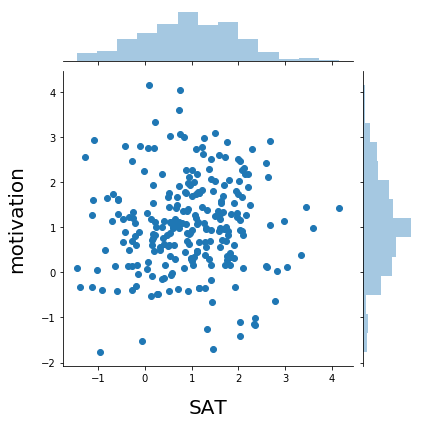

In [4]:
get_joint_distribution(df)

What happens if we condition on college admittance $C$, i.e. on a collider variable?

The Pearson correlation coefficient is  -0.820


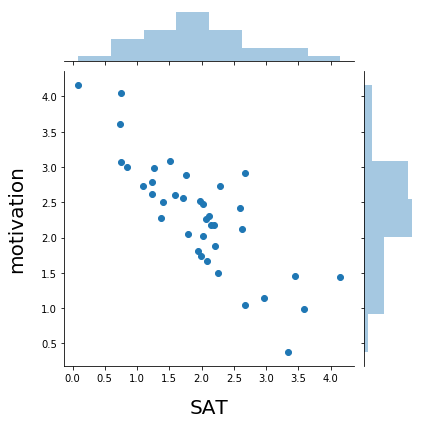

In [5]:
get_joint_distribution(df[is_admitted])

---
## The back-door criterion
---

The **back-door** criterion allows to determine the whether or not conditioning on a given set of observed variables will identify the causal effect of interest.


* **Step 1** Write down the back-door paths from the causal variable to the outcome variable, determine which ones are unblocked, and then search for a candidate conditioning set of observed variables that will block all unblocked back-door paths.


A back-door path is defined as any path between the causal variable and the outcome variable that begins with an arrow that points to the causal variable.

* **Step 2** If a candidate conditioning set is found that blocks all back-door paths, inspect the patterns of decent in the graph in order to verify that the variables in the candidate conditioning set do not block or otherwise adjust away any portion of the causal effect of interest.


If one or more back-door paths connect the causal variable to the outcome variable, the causal effect is identified by conditioning on a set of variables $Z$ if 

**Condition 1** All back-door paths between the causal variable and the outcome variable are blocked after conditioning on $Z$, which will always be the case if each back-door path

* contains a chain of mediation $A\rightarrow C \rightarrow B$ where the middle variable $C$ is in $Z$ 

* contains a fork of mutual dependence $A \leftarrow C \rightarrow B$, where the middle variable $C$ is in $Z$

* contains an inverted fork of mutual causation $A \rightarrow C \leftarrow B$, where the middle variable $C$ and all of $C$'s decendents are **not** in $Z$

and ...



**Condition 2** No variables in $Z$ are decendents of the causal variable that lie on (or decend from other variables that lie on) any of the directed paths that begin at the causal variable and reach the outcome variable.

We will now work through two examples where we focus on only the first conditions of the back-door criterion.

* Let's start with a simple example and apply the idea of back-door identification to a graph where we consider conditioning on a lagged outcome variable $Y_{t -1}$.

<img src="material/fig-backdoor-example-1.png" height="750" width="750" />

* $Y_{t - 1}$ lies on both back-door paths but it does not satisfy the back-door criterion. It blocks one path, but is a collider variable on the other

Let us practice our understanding for some interesting graph structures. The backdoor algorithm is also available [here](https://nbviewer.jupyter.org/github/HumanCapitalAnalysis/microeconometrics/blob/master/lectures/04_criteria_conditioning_estimators/back_door_algorithm.ipynb) for your reference.

Here are a couple of candidates conditioning sets.

* $\{F\}$
* $\{A\}$
* $\{A, B\}$

<img src="material/fig-backdoor-example-1.png" height="500" width="500" />

Finally, let's focus on the second condition.

* **Condition 2** No variables in $Z$ are decendents of the causal variable that lie on (or decend from other variables that lie on) any of the directed paths that begin at the causal variable and reach the outcome variable.

We first look at a graph that illustrates what a descendent is and remind ourselves of the difference between a direct and an indirect effect.

<img src="material/fig-backdoor-indirect-effect.png" height="400" width="400" />

Conditioning on $N$ does not satisfy the back-door criterion due to its violation of the second condition.

Let's evaluate the following conditioning set: $\{O, B\}$.

<img src="material/fig-backdoor-condition-2.png" height="300" width="300" />

---
## Models of causal exposure and point identification based on potential outcome model
---

### Treatment assignment modeling in statistics

Treatment assignment patterns are represented by a general conditional probability distribution:

\begin{align*}
\Pr[D = 1 \mid S], 
\end{align*}
where $S$ denotes all variables that systematically determine treatment assignment.

If all variables in $S$ are observed, then treatment assignment is ignorable
\begin{align*}
(Y^0, Y^1) \perp \!\!\! \perp D \mid S 
\end{align*}

**Nonignorable and ignorable treatment assignment**

<img src="material/fig-assignment-statistics.png" height="500" width="500" />

### Treatment assignment modeling in econometrics


\begin{align*}
Y & = D Y^1 + (1 - D) Y^0 \\
  & = Y^0 + D(Y^1 - Y^0) \\
  & = Y^0 + \delta D \\
  & = \mu^0 + \delta D + \nu^0,
\end{align*}

where $\mu^0 \equiv E[Y^0]$ and $\nu^0 \equiv Y^0 - E[Y^0]$.

Let's emphasize potential treatment effect heterogeneity:

\begin{align*}
Y = \mu^0 + ( \mu^1 - \mu^0) D + \{\nu^0 + D(\nu^1 - \nu^0)\}
\end{align*}
where $\mu^1 \equiv E[Y^1]$ and $\nu^1 \equiv Y^1 - E[Y^1]$.

Let's introduce a latent variable module to be more precise about the 

\begin{align*}
\tilde{D} = Z\phi + U, 
\end{align*}

where $U$ contains systematic unobserved determinants of treatment selection and completely random components.

The latent continuous variable $D$ is then related to our treatment selection dummy as follows.

\begin{align*}
D = \begin{cases}
1 & \quad\text{if}\quad \tilde{D} > 0 \\
0 & \quad\text{otherwise}
\end{cases}
\end{align*}


**Selection on observables and unobservables**

<img src="material/fig-assignment-econometrics.png" height="500" width="500" />

Link to the literature on treatment assignment in statistics:

* $Z$ equals $S$  $\rightarrow$ selection on observables
* $Z$ is only a subset of $S$ $\rightarrow$ selection on unobservables